In [1]:
#importing libraries
import tweepy
import pickle
import re
from tweepy import OAuthHandler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# I have made my keys and consumer for this app
consumer_key=''
consumer_secret=''

access_token=''
access_secret=''


In [3]:
#unique consumer key and secret
auth=OAuthHandler(consumer_key,consumer_secret)
#to access tweets
auth.set_access_token(access_token,access_secret)

args=['facebook']

api=tweepy.API(auth,timeout=10)


In [5]:
#fetching 100 tweets from the api without retweets to remove duplicate
query=args[0]
tweets=[]
if len(args)==1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",lang='en',result_type='recent').items(100):
        tweets.append(status.text)


In [6]:
#our saved model let's open it to use it 
with open('vectorizer.pickle','rb') as f:
    vectorizer=pickle.load(f)

with open('classifier.pickle','rb') as f:
    clf=pickle.load(f)


In [7]:
#checking it's working okay
print('class is ',clf.predict(vectorizer.transform([' you are a very good man i have ever seen'])))


class is  [1]


In [8]:
#preprocess the tweets
preprocessing=[]
for tweet in tweets:
    tweet=re.sub('http+\S+','',tweet) #rempving https http 
    tweet=re.sub('\W',' ',tweet)
    tweet=tweet.lower()
    tweet=re.sub('\s+[a-zA-Z0-9]\s+',' ',tweet)
    tweet=re.sub('^[a-zA-Z0-9]\s+',' ',tweet)
    tweet=re.sub('\s+',' ',tweet)
    preprocessing.append(tweet)


In [9]:
#predict the labels for each tweet
result=[]
for tweet in preprocessing:
    result.append(clf.predict(vectorizer.transform([tweet])))

#counting negative tweets 
counting=0
for res in result:
    if res==0:
        counting+=1


Text(0,0.5,'Numbers')

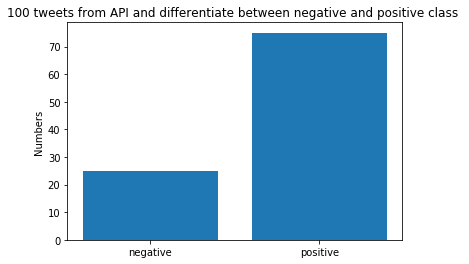

In [10]:
plt.bar(['negative','positive'],[counting,100-counting])
plt.title('100 tweets from API and differentiate between negative and positive class ')
plt.ylabel('Numbers')